# An Introduction to Snow Pits
<iframe width="560" height="315" src="https://www.youtube.com/embed/4Vvlrem4t4E" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>


Tasks:
- construct data set with netcdf
- discuss measurements
- compare bulk density measurements to SWE/depth from pillows
- compare snow temperture measurements between observations

### What is a snow pit?

### What tools are needed to dig a snow pit?

### What information can I derive from a snow pit?

### Okay after our introduction, let's see some data!

In [210]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import xarray as xr
import numpy as np

The `snow_pit_parser.py` file in this folder will allow you to pull all the snow pit data

In [65]:
# Open our data files
ds_data = xr.open_dataset('./kettle_ponds_snowpit_profiles.nc')
ds_layer = xr.open_dataset('./kettle_ponds_snowpit_layers.nc')

Text(0.5, 1.0, 'Example Snow Pit Density Profile\nMar 14 2023')

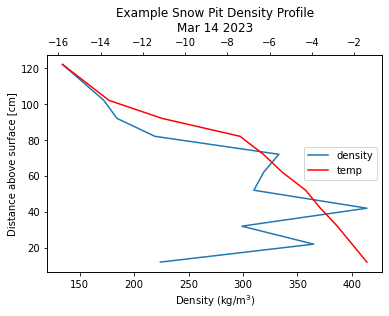

In [73]:

plt.plot(ds_data.isel(time=10).dropna(dim='depth').density,ds_data.isel(time=10).dropna(dim='depth').depth, label='density')
plt.plot([],[], color='r', label='temp')
plt.xlabel("Density (kg/m$^3$)")
plt.ylabel("Distance above surface [cm]")
plt.legend(loc='center right')
plt.twiny()
plt.plot(ds_data.isel(time=10).dropna(dim='depth').temperature,ds_data.isel(time=10).dropna(dim='depth').depth, color='r', label='temp')
# plt.xlim(-10,0)
plt.ylabel("Temperature C")
plt.title("Example Snow Pit Density Profile\nMar 14 2023")

In [ ]:
import urllib

In [41]:
# Provide the path to a directory you want to download the SoS files to
download_directory = '../data/sosnoqc/'

# Provide a the start and end dates you want to download
start_date_mid = '20230106'
end_date_mid = '20230316'

def download_sos_data_day(date, local_download_dir, cache=True):
    """Download a netcdf file from the ftp url provided by the Earth Observing 
    Laboratory at NCAR. Data comes in one NetCDF file per day, Reynolds-Averaged 
    with a 5-minute averaging period.

    Args:
        date (str, optional): String representing a date in format '%Y%m%d'. Defaults to '20221101'.
        local_download_dir (str, optional): Directory to which files will be downloaded. Defaults 
                    to 'sosnoqc'; this directory will be created if it  does not already exist.
        cache (bool, optional): If True, looks in `local_download_dir` for requested  file, if it 
                    exists, does not redownload file. If False, downloads file from the FTP server.

    Returns:
        _type_: Relative path to the downloaded file
    """
    base_url = 'ftp.eol.ucar.edu'
    path = '/pub/archive/isfs/projects/SOS/netcdf/noqc_geo/'
    file = f'isfs_{date}.nc'
    os.makedirs(local_download_dir, exist_ok=True)
    full_file_path = 'ftp://'+base_url+path+file
    download_file_path = os.path.join(local_download_dir, file)
    if cache and os.path.isfile(download_file_path):
        print(f"Caching...skipping download for {date}")
    else:
        urllib.request.urlretrieve(
            full_file_path,
            download_file_path   
        )
    return download_file_path

In [42]:
VARIABLES =[ 'Tsnow_0_4m_d',
             'Tsnow_0_5m_d',
             'Tsnow_0_6m_d',
             'Tsnow_0_7m_d',
             'Tsnow_0_8m_d',
             'Tsnow_0_9m_d',
             'Tsnow_1_0m_d',
             'Tsnow_1_1m_d',
             'Tsnow_1_2m_d',
             'Tsnow_1_3m_d',
             'Tsnow_1_4m_d',
             'Tsnow_1_5m_d',
            "Vtherm_d", 
            "Vpile_d",
            "IDir_d",
            'SWE_p1_c',
            'SWE_p2_c',
            'SWE_p3_c',
            'SWE_p4_c',
            'T_2m_c',
        ]
# Plot lidar snow depth statistics
lidar_6_ds = xr.open_dataset(f"../HW-4/lidar/lidar_l{6}_pillow_depths.nc")
# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = pd.date_range(
    dt.datetime.strptime(start_date_mid, '%Y%m%d'),
    dt.datetime.strptime(end_date_mid, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

# Download one daily file for each date in the datelist. 
# cache = True so that when we rerun the notebook in the future, we don't have to redownload the data.
files = [download_sos_data_day(date, download_directory, cache=True) for date in datelist]

# Open up datasets from every day, extracting our VARIABLES of choice as we open individual datasets. This is so that we have a smaller dataset held 
# in computer memory.
all_datasets = [xr.open_dataset(file)[VARIABLES] for file in files]
sos_dataset_temp = xr.concat(all_datasets, dim='time')
sos_dataset_temp = sos_dataset_temp.shift(time=-84)

Caching...skipping download for 20230106
Caching...skipping download for 20230107
Caching...skipping download for 20230108
Caching...skipping download for 20230109
Caching...skipping download for 20230110
Caching...skipping download for 20230111
Caching...skipping download for 20230112
Caching...skipping download for 20230113
Caching...skipping download for 20230114
Caching...skipping download for 20230115
Caching...skipping download for 20230116
Caching...skipping download for 20230117
Caching...skipping download for 20230118
Caching...skipping download for 20230119
Caching...skipping download for 20230120
Caching...skipping download for 20230121
Caching...skipping download for 20230122
Caching...skipping download for 20230123
Caching...skipping download for 20230124
Caching...skipping download for 20230125
Caching...skipping download for 20230126
Caching...skipping download for 20230127
Caching...skipping download for 20230128
Caching...skipping download for 20230129
Caching...skippi

In [43]:
sos_dataset_60min = sos_dataset_temp.resample(time='1H').mean()
sos_dataset_60min_interpolated = sos_dataset_60min.interp_like(lidar_6_ds)
density_uw = sos_dataset_60min_interpolated['SWE_p1_c'] / lidar_6_ds.sel(pillow='UW', stat='median')['snowdepth']
density_c = sos_dataset_60min_interpolated['SWE_p3_c'] / lidar_6_ds.sel(pillow='C', stat='median')['snowdepth']
density_d = sos_dataset_60min_interpolated['SWE_p4_c'] / lidar_6_ds.sel(pillow='D', stat='median')['snowdepth']

In [117]:
# The function below calculates the surface temperatures from the Apogees
def apogee2temp(ds,tower):
    # hard-coded sensor-specific calibrations
    Vref = 2.5
    ID = ds[f"IDir_{tower}"]
    sns = [136, 137, 138, 139, 140]
    im = [ sns.index(x) if x in sns else None for x in ID ][0]
    # unclear if we want these, or scaled up versions
    mC0 = [57508.575,56653.007,58756.588,58605.7861, 58756.588][im] * 1e5
    mC1 = [289.12189,280.03380,287.12487,285.00285, 287.12487][im] * 1e5
    mC2 = [2.16807,2.11478,2.11822,2.08932, 2.11822][im] * 1e5
    bC0 = [-168.3687,-319.9362,-214.5312,-329.6453, -214.5312][im]* 1e5
    bC1 = [-0.22672,-1.23812,-0.59308,-1.24657, -0.59308][im]* 1e5
    bC2 = [0.08927,0.08612,0.10936,0.09234, 0.10936][im]* 1e5
    # read data
    Vtherm = ds[f"Vtherm_{tower}"]
    Vpile = ds[f"Vpile_{tower}"]*1000
    # calculation of detector temperature from Steinhart-Hart
    Rt = 24900.0/((Vref/Vtherm) - 1)
    Ac = 1.129241e-3
    Bc = 2.341077e-4
    Cc = 8.775468e-8
    TDk = 1/(Ac + Bc*np.log(Rt) + Cc*(np.log(Rt)**3))
    TDc = TDk - 273.15
    # finally, calculation of "target" temperature including thermopile measurement
    m = mC2*TDc**2 + mC1*TDc + mC0
    b = bC2*TDc**2 + bC1*TDc + bC0
    TTc = (TDk**4 + m*Vpile + b)**0.25 - 273.15
    # sufs = suffixes(TTc,leadch='') # get suffixes
    # dimnames(TTc)[[2]] = paste0("Tsfc.Ap.",sufs)
    return TTc

In [118]:
sos_dataset_temp['Tsurf_d'] = (['time'],  apogee2temp(sos_dataset_temp, 'd').values)

c:\Users\dlhogan\anaconda3\envs\radiative_transfer\lib\site-packages\xarray\core\computation.py:742: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


In [119]:
### Compare bulk pit density with bulk density from snow pillows

In [124]:
### Compare temperature profiles with thermistors
snowpit_ds = ds_data.isel(time=10)
print(snowpit_ds.time)
sos_ds = sos_dataset_temp.sel(time=dt.datetime(2023,1,21,9,41), method='nearest')[['Tsnow_0_4m_d',
                                                       'Tsnow_0_5m_d',
                                                       'Tsnow_0_6m_d',
                                                       'Tsnow_0_7m_d',
                                                       'Tsnow_0_8m_d',
                                                       'Tsnow_0_9m_d',
                                                       'Tsnow_1_0m_d',
                                                       'Tsnow_1_1m_d',
                                                       'Tsnow_1_2m_d',
                                                       'Tsnow_1_3m_d',
                                                       'Tsnow_1_4m_d',
                                                       'Tsnow_1_5m_d']].to_array()
surf_temp =  sos_dataset_temp.sel(time=dt.datetime(2023,1,21,9,41), method='nearest')[['Tsurf_d']].to_array()
thermistor_depths = np.arange(40,160,10)

total_depth = snowpit_ds.temperature.dropna(dim='depth').depth[-1].values
snowpit_temp = snowpit_ds.temperature.dropna(dim='depth')

<xarray.DataArray 'time' ()>
array('2023-01-21T09:41:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-01-21T09:41:00
    id       <U4 'KP11'


Text(0.5, 1.0, 'Snow Temperature Profile comparison - Jan 21, 2023')

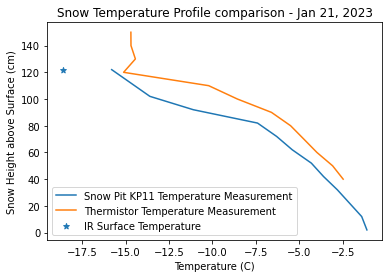

In [126]:
plt.plot(snowpit_temp, snowpit_temp.depth, label='Snow Pit KP11 Temperature Measurement')
plt.plot(sos_ds,thermistor_depths, label='Thermistor Temperature Measurement')
plt.scatter(surf_temp,total_depth,marker='*', label='IR Surface Temperature')
plt.legend()
plt.ylabel('Snow Height above Surface (cm)')
plt.xlabel('Temperature (C)')
plt.title('Snow Temperature Profile comparison - Jan 21, 2023')

In [174]:
### Compare temperature profiles with thermistors
snowpit_ds = ds_data.isel(time=11)
print(snowpit_ds.time)
sos_ds = sos_dataset_temp.sel(time=dt.datetime(2023,1,27,10,47), method='nearest')[['Tsnow_0_4m_d',
                                                       'Tsnow_0_5m_d',
                                                       'Tsnow_0_6m_d',
                                                       'Tsnow_0_7m_d',
                                                       'Tsnow_0_8m_d',
                                                       'Tsnow_0_9m_d',
                                                       'Tsnow_1_0m_d',
                                                       'Tsnow_1_1m_d',
                                                       'Tsnow_1_2m_d',
                                                       'Tsnow_1_3m_d',
                                                       'Tsnow_1_4m_d',
                                                       'Tsnow_1_5m_d']].to_array()
surf_temp =  sos_dataset_temp.sel(time=dt.datetime(2023,1,27,10,47), method='nearest')[['Tsurf_d']].to_array()
thermistor_depths = np.arange(40,160,10)

total_depth = snowpit_ds.temperature.dropna(dim='depth').depth[-1].values
snowpit_temp = snowpit_ds.temperature.dropna(dim='depth')

<xarray.DataArray 'time' ()>
array('2023-01-22T09:35:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-01-22T09:35:00
    id       <U4 'KP12'


Text(0.5, 1.0, 'Snow Temperature Profile comparison - Jan 27, 2023')

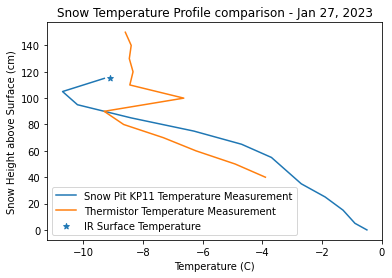

In [129]:
plt.plot(snowpit_temp, snowpit_temp.depth, label='Snow Pit KP11 Temperature Measurement')
plt.plot(sos_ds,thermistor_depths, label='Thermistor Temperature Measurement')
plt.scatter(surf_temp,total_depth,marker='*', label='IR Surface Temperature')
plt.legend()
plt.ylabel('Snow Height above Surface (cm)')
plt.xlabel('Temperature (C)')
plt.title('Snow Temperature Profile comparison - Jan 27, 2023')

In [171]:
### Compare surface temperatures
### Compare temperature profiles with thermistors
surface_temp=[]
ir_surface_temp=[]
for t in ds_data.time:
    surface_temp.append(ds_data.sel(time=t).temperature.dropna(dim='depth')[-1].values)
    ir_surface_temp.append(sos_dataset_temp['Tsurf_d'].sel(time=t,method='bfill').values)
sos_ds = sos_dataset_temp['Tsurf_d']



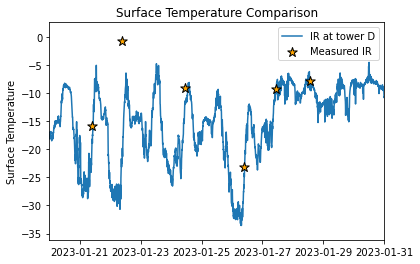

In [153]:
plt.plot(sos_ds[sos_ds<10].time,sos_ds[sos_ds<10], label='IR at tower D')
plt.scatter(ds_data.time,surface_temp, marker='*', color='orange', s=100, ec='k',zorder=10, label='Measured IR')
plt.xlim(dt.date(2023,1,20),dt.date(2023,1,31))
plt.ylabel('Surface Temperature')
plt.title('Surface Temperature Comparison')
plt.legend()

Text(0.5, 0, 'Snow Pit Surface Temp (C)')

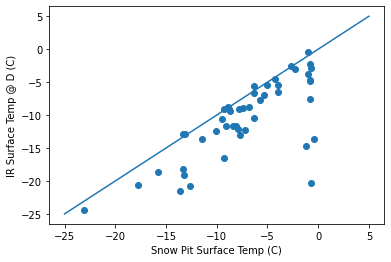

In [172]:
plt.scatter(surface_temp,np.array(ir_surface_temp))
plt.plot([-25,5],[-25,5])
plt.ylabel('IR Surface Temp @ D (C)')
plt.xlabel('Snow Pit Surface Temp (C)')

In [181]:
### Compare pillow snow depth with snow depth

lidar_6_ds.sel(pillow='C', time=slice('2023-01-06','2023-03-17'))

<xarray.Dataset>
Dimensions:    (time: 149, stat: 6, pillow: 3)
Coordinates:
  * time       (time) datetime64[ns] 2022-10-14 2022-10-15 ... 2023-03-21
  * stat       (stat) object 'mean' 'stddev' 'median' 'min' 'max' 'count'
  * pillow     (pillow) object 'C' 'UW' 'D'
Data variables:
    snowdepth  (time, stat, pillow) float64 0.002006 0.05787 ... 35.0 9.34e+03

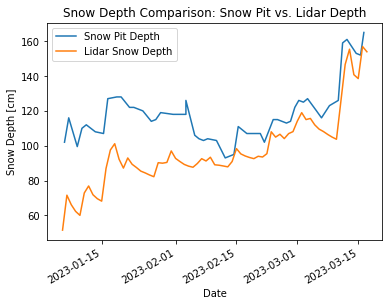

In [197]:
### Plot snow depth over time
snow_depth=[]
for t in ds_data.time:
    snow_depth.append(ds_data.sel(time=t).temperature.dropna(dim='depth').depth[-1].values)
plt.plot(ds_data.time, snow_depth, label='Snow Pit Depth')
(lidar_6_ds.sel(pillow='C', stat='mean', time=slice('2023-01-06','2023-03-17'))['snowdepth']*100).plot(label='Lidar Snow Depth')
plt.ylabel('Snow Depth [cm]')
plt.xlabel('Date')
plt.title('Snow Depth Comparison: Snow Pit vs. Lidar Depth')
plt.legend()

In [208]:
### Plot snow depth over time
snow_density=[]
for t in ds_data.time:
    snow_density.append(ds_data.sel(time=t).density.dropna(dim='depth').mean().values)

Text(0.5, 1.0, 'Snow Density Measurements')

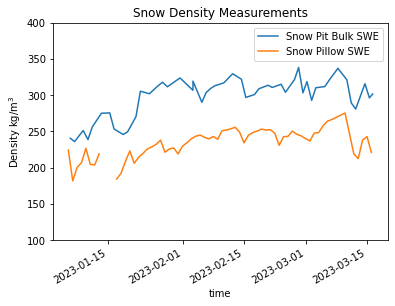

In [209]:
plt.plot(ds_data.time,snow_density, label='Snow Pit Bulk SWE')
density_c.plot(label='Snow Pillow SWE')
plt.ylim(100,400)
plt.legend()
plt.ylabel('Density kg/m$^3$')
plt.title('Snow Density Measurements')